In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/My Drive/Colab Notebooks/reto3

!ls

/content/drive/My Drive/Colab Notebooks/reto3
models	reto3.ipynb  reto3_testX.csv  reto3_trainX.csv	reto3_trainY.csv


In [3]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sb

%matplotlib inline
from matplotlib import pyplot as plt

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA, KernelPCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [4]:
trainset = pd.read_csv('reto3_trainX.csv')
labelset = pd.read_csv('reto3_trainY.csv')

names = trainset.columns

print(trainset.shape)
print(labelset.shape)

(116202, 54)
(116202, 1)


In [ ]:
trainset.head()
#labelset.head()

<BarContainer object of 7 artists>

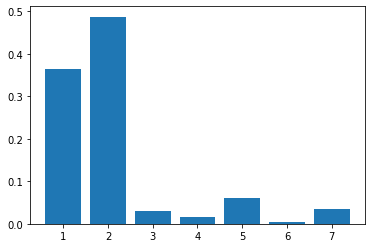

In [5]:
trainset2 = trainset.copy()
trainset2['tipo_bosque'] = labelset

plt.bar(trainset2['tipo_bosque'].unique(),trainset2['tipo_bosque'].value_counts(normalize=True,sort=False))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(trainset, labelset, train_size=0.80, test_size=0.20, random_state=101)

In [6]:

scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print(X_train_norm.shape)
print(y_train.shape)

(92961, 54)
(92961,)


In [ ]:

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print(X_train_norm.shape)
print(y_train.shape)

(92961, 54)
(92961,)


In [7]:
n_components = 15 #<- now, there is NO limit in the number of "components"
kernel = "sigmoid" # options are: "linear", "poly", "rbf", "sigmoid"
kernel_parameter = 1

pca = PCA(n_components = n_components)
X_train_proy = pca.fit_transform(X_train_norm)
X_test_proy = pca.transform(X_test_norm)


In [9]:
def TryParamsRF(x_data,y_data,param_grid=None):
  if param_grid==None:
    param_grid = {'n_estimators': [100, 150, 200, 250], 'max_depth': [1, 2], 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2']}

  forest = RandomForestClassifier(random_state=0,verbose=0)
  forest_grid = GridSearchCV(forest,param_grid,refit=True,verbose=2)
  forest_grid.fit(x_data,y_data)
  return forest_grid


#MinMaxScaler -> {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'n_estimators': 250}
#StandartScaler -> {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'n_estimators': 250}

In [11]:
find_best_model = 0  #<-- 0=train with fixed parameters ||1=train models using diferents parameters

if find_best_model==1:
  #param_grid = {'n_estimators': [250], 'max_depth': [2], 'criterion': ['gini'], 'max_features': ['auto']}
  param_grid = {'n_estimators': [100, 150, 200, 250], 'max_depth': [1, 2], 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2']}
  forest_grid = TryParamsRF(X_proy,y_train,param_grid=param_grid)
  n_estimators = forest_grid.best_estimator_.n_estimators
  max_depth = forest_grid.best_estimator_.max_depth
  criterion = forest_grid.best_estimator_.criterion
  max_features = forest_grid.best_estimator_.max_features
  print(forest_grid.best_estimator_)

else:
  n_estimators = 200
  max_depth = 12
  criterion = 'gini'
  max_features = 'auto'

forest = RandomForestClassifier(random_state=0,
                                verbose=0,
                                n_estimators=n_estimators,
                                max_depth=max_depth,
                                criterion=criterion,
                                max_features=max_features)

forest.fit(X_train_proy,y_train)
importances = forest.feature_importances_

predictions = forest.predict(X_test_proy)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 5638  2740     9     0     0     0    65]
 [ 1079 10173   109     0     6    33     8]
 [    0   148  1275     4     0    44     0]
 [    0     0    60    47     0    10     0]
 [   22   267    11     0    27     0     0]
 [    4   192   216     4     0   281     0]
 [  174    92     0     0     0     0   503]]
              precision    recall  f1-score   support

           1       0.82      0.67      0.73      8452
           2       0.75      0.89      0.81     11408
           3       0.76      0.87      0.81      1471
           4       0.85      0.40      0.55       117
           5       0.82      0.08      0.15       327
           6       0.76      0.40      0.53       697
           7       0.87      0.65      0.75       769

    accuracy                           0.77     23241
   macro avg       0.80      0.57      0.62     23241
weighted avg       0.78      0.77      0.76     23241



In [ ]:
flt = (importances > 0.01)

plt.barh(names[flt], importances[flt])

In [ ]:
new_importances = importances[flt]
new_names = names[flt]

trainset_v2 = trainset[new_names].copy()
print(trainset_v2.shape)

(116202, 17)


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(trainset_v2, labelset, train_size=0.80, test_size=0.20, random_state=101)

scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# **SVC**  
#### **(SUPPORT VECTOR MACHINE CLASSIFIER)**

In [ ]:
def TryParamsSVC(x_data, y_data, params_grid=None):

  if params_grid==None:
    param_grid = {'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4, 5], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'sigmoid','poly']}

  model = SVC()
  grid = GridSearchCV(model,param_grid,refit=True,verbose=2)
  grid.fit(X_train,y_train)
  return grid  

In [ ]:
find_best_model = 0  #<-- 0=train with fixed parameters ||1=train models using diferents parameters

if find_best_model==1:
  param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.001], 'kernel': ['rbf', 'sigmoid']}
  TryParamsSVC(X_train_norm,y_train,params_grids)
  c = grid.best_estimator_.c
  gamma = grid.best_estimator_.gamma
  kernel = grid.best_estimator_.kernel
  degree = grid.best_estimator_.degree

else: #Manual inputs of parameters.
  c = 0.1
  gamma = 'auto'
  kernel = 'sigmoid'
  degree = 3 #-> Ignored if kernel is not a Poly.

model = SVC(random_state=0, verbose=2, kernel=kernel, C=c, gamma=gamma, degree=degree)
model.fit(X_train_proy,y_train)

predictions = model.predict(X_test_proy)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[LibSVM]

# **ADA BOOST CLASSIFIER**

In [ ]:
n_estimators = 100
lr = 0.1

ABC = AdaBoostClassifier(n_estimators=n_estimators, random_state=0)
ABC.fit(X_proy, y_train)

testdata=pca.transform(X_test)
predictions = ABC.predict(testdata)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

In [ ]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2]}

parameters = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1]}

# **DECISION TREE CLASSIFIER**

In [ ]:
max_depth = 15

DT = DecisionTreeClassifier(random_state=0, max_depth=max_depth)
DT.fit(X_train_norm, y_train)

predictions = DT.predict(X_test_norm)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 6409  1955     2     0     8     2    76]
 [ 1182 10089    53     0    35    40     9]
 [    0   134  1172    21     2   142     0]
 [    0     0    38    60     0    19     0]
 [    6   212     3     0   106     0     0]
 [    1   120   163     7     3   403     0]
 [  167    20     0     0     0     0   582]]
              precision    recall  f1-score   support

           1       0.83      0.76      0.79      8452
           2       0.81      0.88      0.84     11408
           3       0.82      0.80      0.81      1471
           4       0.68      0.51      0.59       117
           5       0.69      0.32      0.44       327
           6       0.67      0.58      0.62       697
           7       0.87      0.76      0.81       769

    accuracy                           0.81     23241
   macro avg       0.77      0.66      0.70     23241
weighted avg       0.81      0.81      0.81     23241



# **Gradient Boosting Classifier**

In [ ]:
n_estimators = 100
lr = 0.08

GBC = GradientBoostingClassifier(learning_rate=lr, n_estimators=n_estimators)
GBC.fit(X_train_norm, y_train)

predictions = GBC.predict(X_test_norm)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[6238 2120    4    0    6    3   81]
 [2060 9113  132    0   18   75   10]
 [   0  166 1201   19    0   85    0]
 [   0    0   49   64    0    4    0]
 [   1  260   12    0   54    0    0]
 [   0  173  294    8    0  222    0]
 [ 285    5    0    0    0    0  479]]
              precision    recall  f1-score   support

           1       0.73      0.74      0.73      8452
           2       0.77      0.80      0.78     11408
           3       0.71      0.82      0.76      1471
           4       0.70      0.55      0.62       117
           5       0.69      0.17      0.27       327
           6       0.57      0.32      0.41       697
           7       0.84      0.62      0.72       769

    accuracy                           0.75     23241
   macro avg       0.72      0.57      0.61     23241
weighted avg       0.75      0.75      0.74     23241



# **SAVE MODEL USING PICKLE**

In [ ]:
import pickle
from datetime import datetime

now = datetime.now()
date = now.strftime("%d/%m/_%H:%M:%S")

filename = 'models/SVC_'
path_file = filename+date+'.sav'

pickle.dump(model, open(path_file, 'wb'))

(116202,)


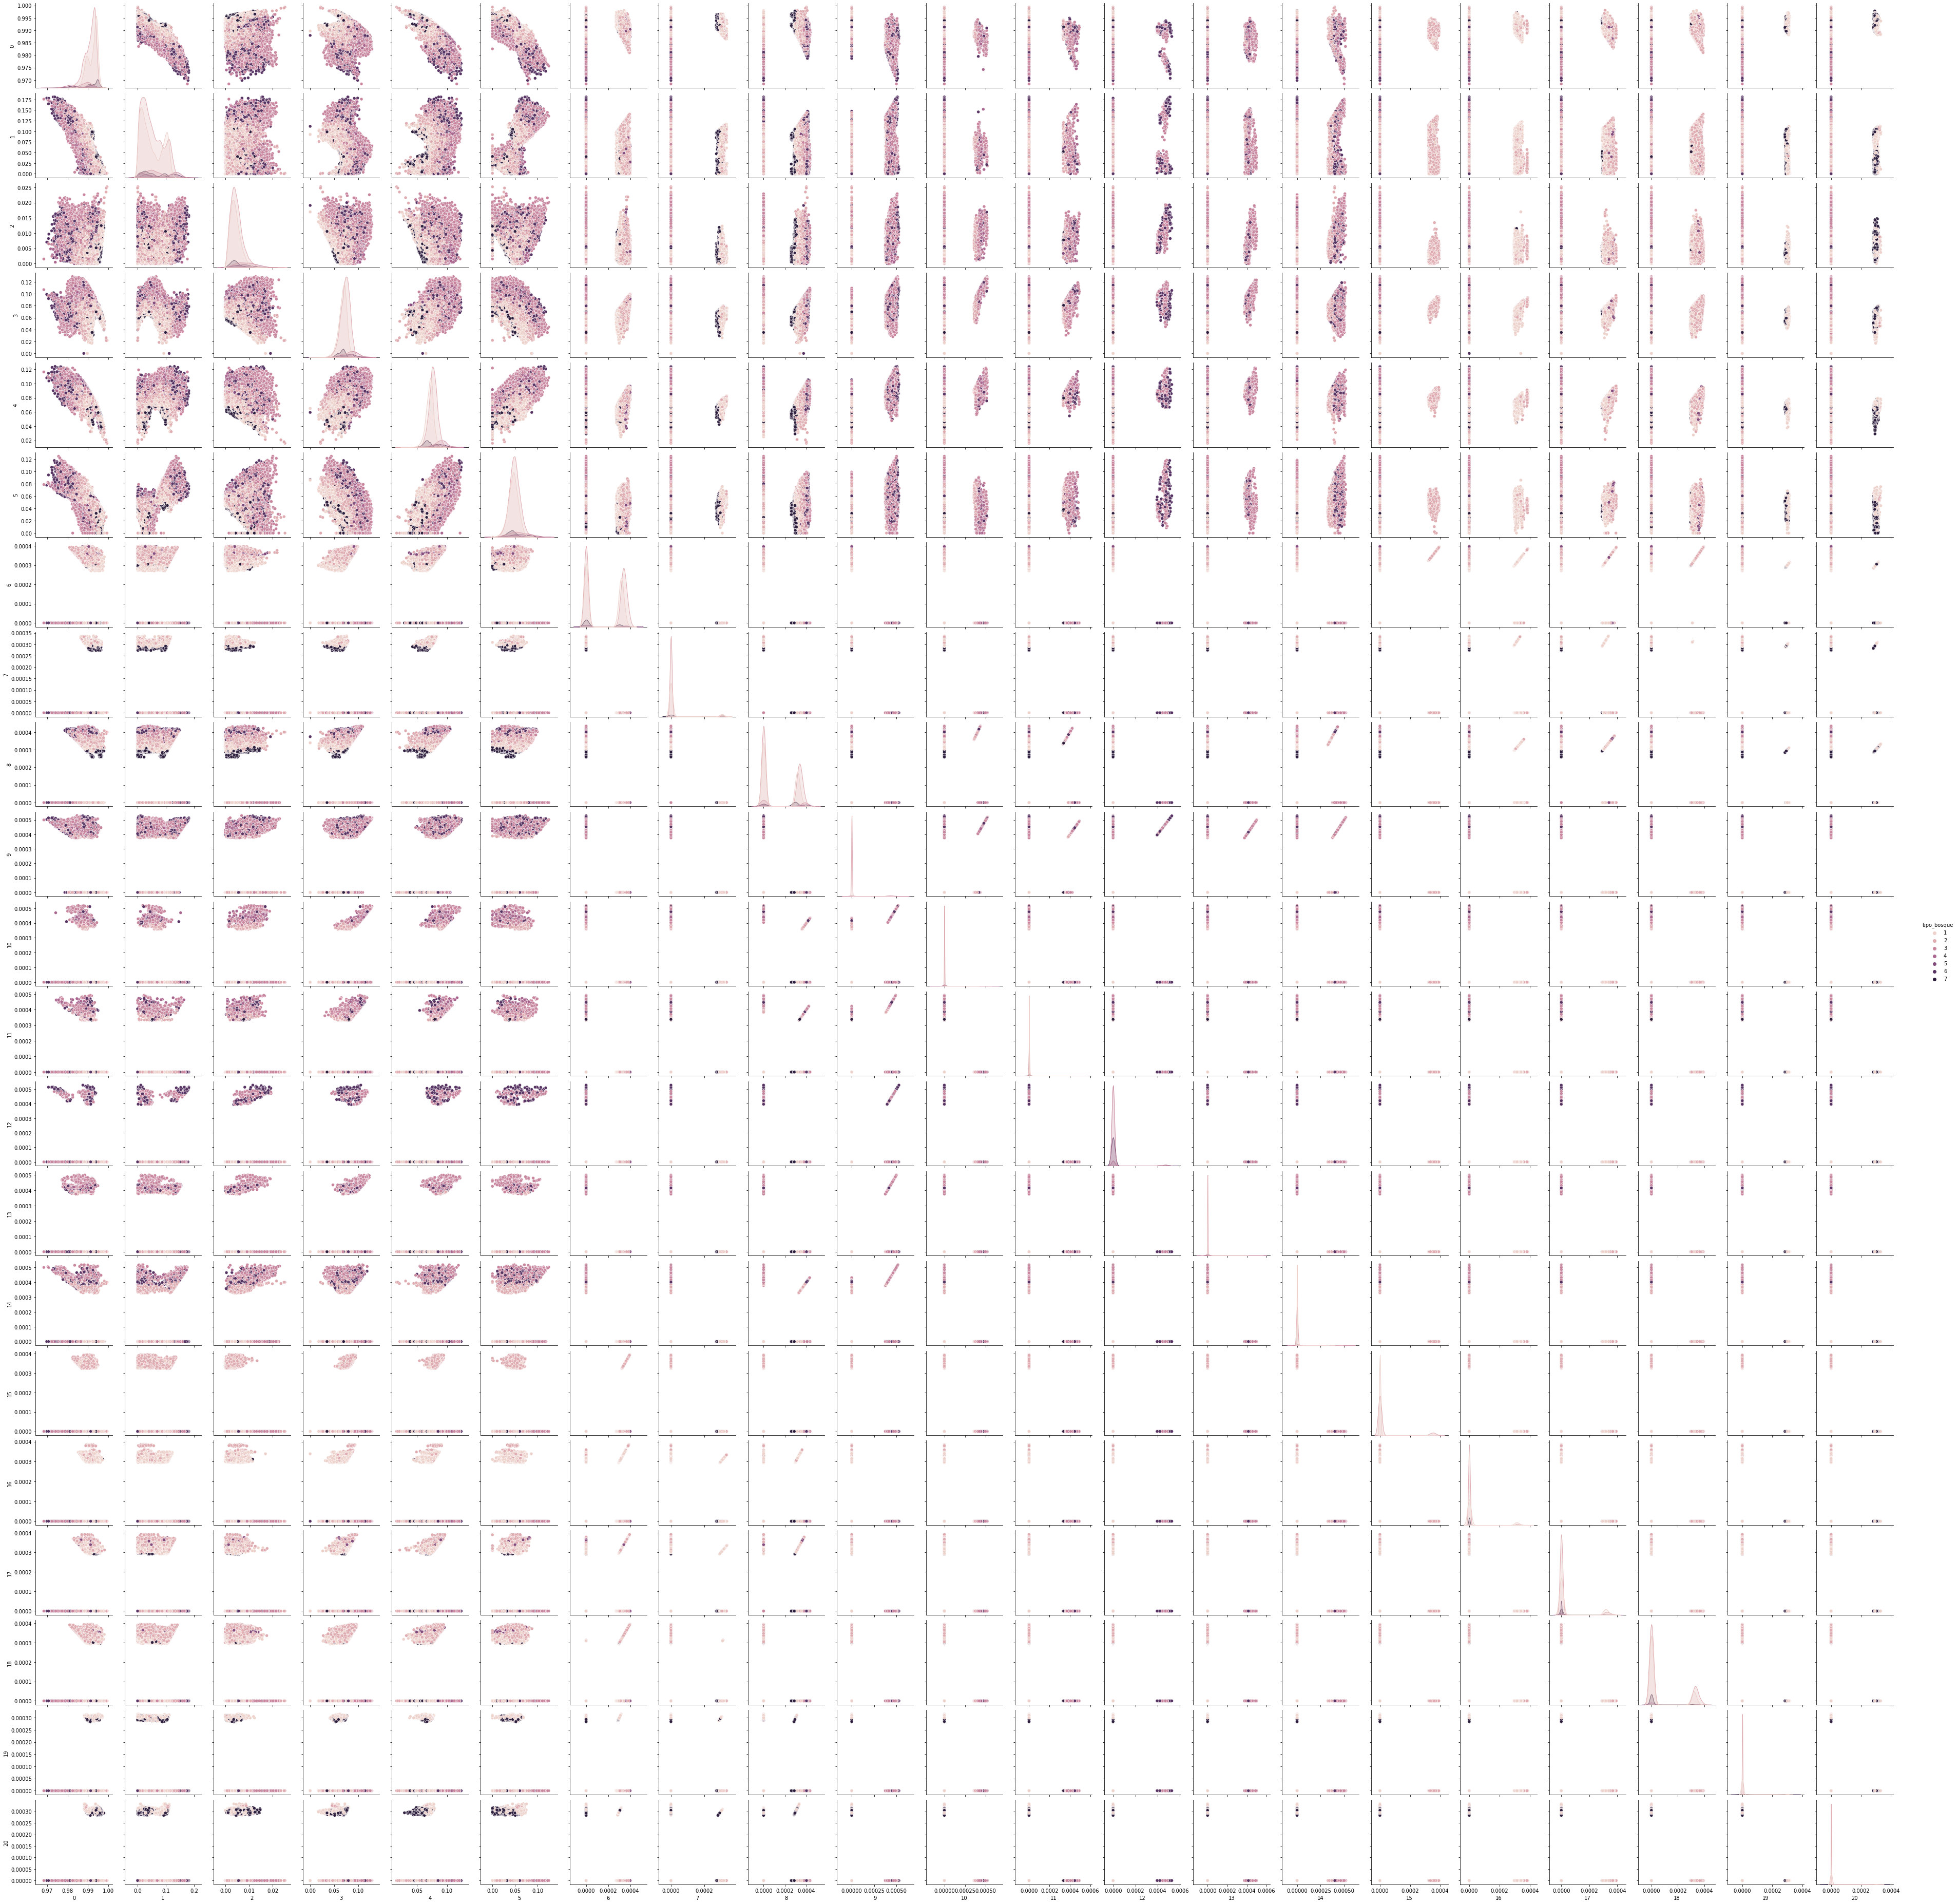

In [ ]:
y_train.head()
print(y_train['tipo_bosque'].shape)
pd_train['tipo_bosque'] = y_train

sb.pairplot(pd_train, hue='tipo_bosque')